In [1]:
from numpy.linalg import inv
#from gaussian_processes_util import plot_gp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def kernel(X1, X2, l=1.0, sigma_f=1.0):
    """
    Isotropic squared exponential kernel.
    
    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        (m x n) matrix.
    """
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    print(sqdist)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

def kernel_1d(X1, X2, l=1.0, sigma_f=1.0):
    """
    Isotropic squared exponential kernel.
    
    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        (m x n) matrix.
    """
    sqdist = reshape( X1**2 ) + X2**2 - 2 * dotdot_1d( X1, X2 )
    print(sqdist)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

def reshape(X):
    return np.array([[x] for x in X ])

def dotdot_1d(v1,v2):
    # ugly but works...
    dot = np.zeros( ( len(v1),len(v2) ) )
    for i,n1 in enumerate(v1):
        for j,n2 in enumerate(v2):
            dot[i][j] = n1*n2
    return dot
        

X = np.arange(-5, 5, 0.2).reshape(-1, 1)
X_1d = np.arange(-5, 5, 0.2)

res = kernel_1d(X_1d,X_1d)
ref = kernel(X,X)
#print(  res )
#print(  ref )

[[0.000e+00 4.000e-02 1.600e-01 ... 8.836e+01 9.216e+01 9.604e+01]
 [4.000e-02 0.000e+00 4.000e-02 ... 8.464e+01 8.836e+01 9.216e+01]
 [1.600e-01 4.000e-02 0.000e+00 ... 8.100e+01 8.464e+01 8.836e+01]
 ...
 [8.836e+01 8.464e+01 8.100e+01 ... 0.000e+00 4.000e-02 1.600e-01]
 [9.216e+01 8.836e+01 8.464e+01 ... 4.000e-02 0.000e+00 4.000e-02]
 [9.604e+01 9.216e+01 8.836e+01 ... 1.600e-01 4.000e-02 0.000e+00]]
[[0.000e+00 4.000e-02 1.600e-01 ... 8.836e+01 9.216e+01 9.604e+01]
 [4.000e-02 0.000e+00 4.000e-02 ... 8.464e+01 8.836e+01 9.216e+01]
 [1.600e-01 4.000e-02 0.000e+00 ... 8.100e+01 8.464e+01 8.836e+01]
 ...
 [8.836e+01 8.464e+01 8.100e+01 ... 0.000e+00 4.000e-02 1.600e-01]
 [9.216e+01 8.836e+01 8.464e+01 ... 4.000e-02 0.000e+00 4.000e-02]
 [9.604e+01 9.216e+01 8.836e+01 ... 1.600e-01 4.000e-02 0.000e+00]]


In [3]:
a =  np.sum(X**2, 1).reshape(-1, 1) 
b = np.array(   [[x] for x in X_1d**2  ] )  
np.sum(a-b)

0.0

In [4]:
print( np.sum(X**2, 1) )
print( X_1d**2 )
print( np.sum(X**2, 1) - X_1d**2 )
np.sum( np.sum(X**2, 1) - X_1d**2 )

[2.50000000e+01 2.30400000e+01 2.11600000e+01 1.93600000e+01
 1.76400000e+01 1.60000000e+01 1.44400000e+01 1.29600000e+01
 1.15600000e+01 1.02400000e+01 9.00000000e+00 7.84000000e+00
 6.76000000e+00 5.76000000e+00 4.84000000e+00 4.00000000e+00
 3.24000000e+00 2.56000000e+00 1.96000000e+00 1.44000000e+00
 1.00000000e+00 6.40000000e-01 3.60000000e-01 1.60000000e-01
 4.00000000e-02 1.97215226e-29 4.00000000e-02 1.60000000e-01
 3.60000000e-01 6.40000000e-01 1.00000000e+00 1.44000000e+00
 1.96000000e+00 2.56000000e+00 3.24000000e+00 4.00000000e+00
 4.84000000e+00 5.76000000e+00 6.76000000e+00 7.84000000e+00
 9.00000000e+00 1.02400000e+01 1.15600000e+01 1.29600000e+01
 1.44400000e+01 1.60000000e+01 1.76400000e+01 1.93600000e+01
 2.11600000e+01 2.30400000e+01]
[2.50000000e+01 2.30400000e+01 2.11600000e+01 1.93600000e+01
 1.76400000e+01 1.60000000e+01 1.44400000e+01 1.29600000e+01
 1.15600000e+01 1.02400000e+01 9.00000000e+00 7.84000000e+00
 6.76000000e+00 5.76000000e+00 4.84000000e+00 4.00000

0.0

In [5]:
print( dotdot_1d( X_1d, X_1d ) )
print( np.dot(X, X.T) )
print( dotdot_1d( X_1d, X_1d ) - np.dot(X, X.T) )
np.sum( dotdot_1d( X_1d, X_1d ) - np.dot(X, X.T) )

[[ 25.    24.    23.   ... -22.   -23.   -24.  ]
 [ 24.    23.04  22.08 ... -21.12 -22.08 -23.04]
 [ 23.    22.08  21.16 ... -20.24 -21.16 -22.08]
 ...
 [-22.   -21.12 -20.24 ...  19.36  20.24  21.12]
 [-23.   -22.08 -21.16 ...  20.24  21.16  22.08]
 [-24.   -23.04 -22.08 ...  21.12  22.08  23.04]]
[[ 25.    24.    23.   ... -22.   -23.   -24.  ]
 [ 24.    23.04  22.08 ... -21.12 -22.08 -23.04]
 [ 23.    22.08  21.16 ... -20.24 -21.16 -22.08]
 ...
 [-22.   -21.12 -20.24 ...  19.36  20.24  21.12]
 [-23.   -22.08 -21.16 ...  20.24  21.16  22.08]
 [-24.   -23.04 -22.08 ...  21.12  22.08  23.04]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


0.0

In [6]:
print(  res.shape )
print(  ref.shape )
print( res - ref )
print( np.sum( res - ref ) )
print( res[0][2], res[2][0] )
print( ref[0][2], ref[2][0] )

# fix this first... cant work ;)
print( "fix this first... cant work ;)")

(50, 50)
(50, 50)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.0
0.9231163463866373 0.9231163463866373
0.9231163463866373 0.9231163463866373
fix this first... cant work ;)


[[0.000e+00 4.000e-02 1.600e-01 ... 8.836e+01 9.216e+01 9.604e+01]
 [4.000e-02 0.000e+00 4.000e-02 ... 8.464e+01 8.836e+01 9.216e+01]
 [1.600e-01 4.000e-02 0.000e+00 ... 8.100e+01 8.464e+01 8.836e+01]
 ...
 [8.836e+01 8.464e+01 8.100e+01 ... 0.000e+00 4.000e-02 1.600e-01]
 [9.216e+01 8.836e+01 8.464e+01 ... 4.000e-02 0.000e+00 4.000e-02]
 [9.604e+01 9.216e+01 8.836e+01 ... 1.600e-01 4.000e-02 0.000e+00]]
[[ 0  1  4  9 25]
 [ 1  0  1  4 16]
 [ 4  1  0  1  9]
 [ 9  4  1  0  4]
 [25 16  9  4  0]]
[[1.000e+00 6.400e-01 3.600e-01 1.600e-01 4.000e-02 0.000e+00 4.000e-02
  1.600e-01 3.600e-01 6.400e-01 1.000e+00 1.440e+00 1.960e+00 2.560e+00
  3.240e+00 4.000e+00 4.840e+00 5.760e+00 6.760e+00 7.840e+00 9.000e+00
  1.024e+01 1.156e+01 1.296e+01 1.444e+01 1.600e+01 1.764e+01 1.936e+01
  2.116e+01 2.304e+01 2.500e+01 2.704e+01 2.916e+01 3.136e+01 3.364e+01
  3.600e+01 3.844e+01 4.096e+01 4.356e+01 4.624e+01 4.900e+01 5.184e+01
  5.476e+01 5.776e+01 6.084e+01 6.400e+01 6.724e+01 7.056e+01 7.396e+

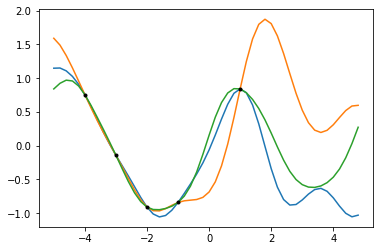

In [13]:
def posterior(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    """
    Computes the suffifient statistics of the posterior distribution 
    from m training data X_train and Y_train and n new inputs X_s.
    
    Args:
        X_s: New input locations (n x d).
        X_train: Training locations (m x d).
        Y_train: Training targets (m x 1).
        l: Kernel length parameter.
        sigma_f: Kernel vertical variation parameter.
        sigma_y: Noise parameter.
    
    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    """
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)
    
    # Equation (7)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    # Equation (8)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    
    return mu_s, cov_s

# Finite number of points
X = np.arange(-5, 5, 0.2).reshape(-1, 1)

# Mean and covariance of the prior
mu = np.zeros(X.shape)
cov = kernel(X, X)

# Draw three samples from the prior
samples = np.random.multivariate_normal(mu.ravel(), cov, 3)

# Plot GP mean, uncertainty region and samples 
#plot_gp(mu, cov, X, samples=samples)

# Noise free training data
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)

# Compute mean and covariance of the posterior distribution
mu_s, cov_s = posterior(X, X_train, Y_train)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
#plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)


plt.plot( np.squeeze(X), samples.T )
plt.plot(np.squeeze(X_train),np.squeeze(Y_train),".k")
plt.show()

In [14]:
import random

[[ 0.    0.04  0.16  0.36  0.64  1.    1.44  1.96  2.56  3.24  4.    4.84
   5.76  6.76  7.84  9.   10.24 11.56 12.96 14.44 16.   17.64 19.36 21.16
  23.04]
 [ 0.04  0.    0.04  0.16  0.36  0.64  1.    1.44  1.96  2.56  3.24  4.
   4.84  5.76  6.76  7.84  9.   10.24 11.56 12.96 14.44 16.   17.64 19.36
  21.16]
 [ 0.16  0.04  0.    0.04  0.16  0.36  0.64  1.    1.44  1.96  2.56  3.24
   4.    4.84  5.76  6.76  7.84  9.   10.24 11.56 12.96 14.44 16.   17.64
  19.36]
 [ 0.36  0.16  0.04  0.    0.04  0.16  0.36  0.64  1.    1.44  1.96  2.56
   3.24  4.    4.84  5.76  6.76  7.84  9.   10.24 11.56 12.96 14.44 16.
  17.64]
 [ 0.64  0.36  0.16  0.04  0.    0.04  0.16  0.36  0.64  1.    1.44  1.96
   2.56  3.24  4.    4.84  5.76  6.76  7.84  9.   10.24 11.56 12.96 14.44
  16.  ]
 [ 1.    0.64  0.36  0.16  0.04  0.    0.04  0.16  0.36  0.64  1.    1.44
   1.96  2.56  3.24  4.    4.84  5.76  6.76  7.84  9.   10.24 11.56 12.96
  14.44]
 [ 1.44  1.    0.64  0.36  0.16  0.04  0.    0.04  0.16  0.36 

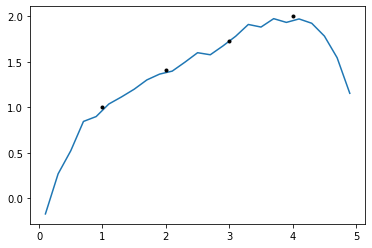

In [26]:
def randoms(size):
    return np.array([ random.random() for _ in range(size)  ])

def box_muller_1d(size):    
    U1 = randoms(size)
    U2 = randoms(size)
    R = np.sqrt(-2 * np.log(U1))
    Theta = 2 * np.pi * U2
    X = R * np.cos(Theta)
    Y = R * np.sin(Theta)
    return X

def sample_gauss_box_mueller_1d(mu,sigma,size):
    #print("this is box mueller")
    return box_muller_1d(size) * sigma + mu

def sample_multivariante_normal_1d(mu,K,epsilon=1e-3):
    d = len(mu)
    Kx = K + epsilon*np.eye(d)
    L = np.linalg.cholesky(Kx)
    u = sample_gauss_box_mueller_1d(0, 1, d )
    mu1 = mu.transpose()
    return mu1 + np.dot(L, u)

def posterior_1d(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    """
    Computes the suffifient statistics of the posterior distribution 
    from m training data X_train and Y_train and n new inputs X_s.
    
    Args:
        X_s: New input locations (n x d).
        X_train: Training locations (m x d).
        Y_train: Training targets (m x 1).
        l: Kernel length parameter.
        sigma_f: Kernel vertical variation parameter.
        sigma_y: Noise parameter.
    
    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    """
    K = kernel_1d(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel_1d(X_train, X_s, l, sigma_f)
    K_ss = kernel_1d(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = np.linalg.inv(K)
    
    # Equation (7)
    mu_s_1 = K_s.T.dot(K_inv).dot(Y_train)
    mu_s = np.dot(np.dot(K_s.transpose(),K_inv),Y_train)
    print( "sum mu=0? ", np.sum( mu_s - mu_s_1 ) )
    
    # Equation (8)
    cov_s_1 = K_ss - K_s.T.dot(K_inv).dot(K_s)
    cov_s = K_ss - np.dot(np.dot(K_s.T,K_inv),K_s)
    print( "sum cov=0? ", np.sum( cov_s - cov_s_1 ) )
    
    return mu_s, cov_s



# Mean and covariance of the prior
#mu = np.zeros(X.shape)
#cov = kernel_1d(X, X)

#print(cov)

# Draw three samples from the prior
#samples = sample_multivariante_normal_1d(mu, cov )

# Plot GP mean, uncertainty region and samples 
#plot_gp(mu, cov, X, samples=samples)

# Finite number of points
X = np.arange(0.1, 5, 0.2)
# Noise free training data
X_train = np.array([ 1, 2, 3, 4])
Y_train = np.sqrt(X_train)
#X_train = np.array([-4, -3, -2, -1, 1])
#Y_train = np.cos(X_train)



# Compute mean and covariance of the posterior distribution
mu_s, cov_s = posterior_1d(X, X_train, Y_train)

samples = sample_multivariante_normal_1d( mu_s, cov_s )
#plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)


plt.plot( np.squeeze(X), samples.T )
plt.plot(np.squeeze(X_train),np.squeeze(Y_train),".k")
plt.show()